In [1]:
import pandas as pd
import pickle

from gensim import corpora, models, matutils
import scipy.sparse

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from skills.data_preprocess.data.inputs import *
from skills.data_preprocess.data_transform import get_jd_dataframe, run_data_transform_pipeline, transform_syllabus_to_lda_model
from skills.data_preprocess.coherence_graph import compute_coherence_values

import plotly.express as px

import logging

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open('../../skills/data_preprocess/data/inputs/JobRoleJD.pickle', 'rb')
role_jd = pickle.load(f)
f.close()

In [3]:
roles = list(role_jd.keys())
roles.sort()

In [4]:
jd_df = get_jd_dataframe(role_jd)
jd_df.head()

description
Business Analyst     key skills required for the job are\n\nosi pi-...
Data Analyst         about business -\n\nglobal sales enablement an...
Data Scientist       key skills required for the job are: n python ...
Front-end Developer  experience essential\n\nat least 5 years in a ...
Network Engineer     key skills required for the job are: n python ...

In [5]:
data_dtm, cv = run_data_transform_pipeline(jd_df, True)
data_dtm.head()

n   #  # #  # automation  # broad  # business  \
Business Analyst     0   0   7    0             0        0           0   
Data Analyst         0   0  14    0             0        0           0   
Data Scientist       1   1  21    0             0        0           2   
Front-end Developer  0   0   8    4             0        0           0   
Network Engineer     2   1   4    0             0        0           0   

                     # cloud  # design  # develops  ...  🏢 working  👉  👉 #  \
Business Analyst           0         0           0  ...          0  0    0   
Data Analyst               1         0           0  ...          0  0    0   
Data Scientist             0         1           0  ...          0  0    0   
Front-end Developer        0         1           0  ...          1  4    1   
Network Engineer           0         0           0  ...          0  0    0   

                     👉 b  👉 office  👉 scrum  💃  💃 ‍  📍  📍 guindy  
Business Analyst       0         0        0  0    0  0         0  
Data Analyst           0         0        0  0    0  0         0  
Data Scientist         0         0        0  0    0  0         0  
Front-end Developer    1         1        1  1    1  1         1  
Network Engineer       0         0        0  0    0  0         0  

[5 rows x 164311 columns]

EXPLORATORY DATA ANALYSIS

In [6]:
data = data_dtm.transpose()
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
print(top_dict)

{'Business Analyst': [('investment', 294), ('business analysis', 275), ('trac', 268), ('excel', 249), ('trade', 170), ('bank', 148), ('investment banking', 146), ('regulation', 132), ('investment bank', 131), ('tableau', 129), ('business business', 128), ('plans', 123), ('statistical', 116), ('regulations', 111), ('analysis business', 109), ('complex business', 109), ('process improvement', 106), ('quantitative', 102), ('expertise business', 101), ('audit', 98), ('progress', 98), ('accounting', 96), ('statistics', 90), ('completion', 90), ('hcm', 89), ('leaders', 86), ('creative design', 84), ('contracts', 84), ('design innovative', 83), ('accounts', 83)], 'Data Analyst': [('statistical', 341), ('statistics', 224), ('spark', 219), ('hive', 185), ('large data', 166), ('tableau', 165), ('support maintenance', 137), ('data engineer', 137), ('developer development', 136), ('independent capable', 134), ('quantitative', 132), ('software programs', 130), ('debug software', 129), ('hadoop', 12

In [7]:
for job_role, top_words in top_dict.items():
    print(job_role)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Business Analyst
investment, business analysis, trac, excel, trade, bank, investment banking, regulation, investment bank, tableau, business business, plans, statistical, regulations, analysis business, complex business, process improvement, quantitative, expertise business, audit, progress, accounting, statistics, completion, hcm, leaders, creative design, contracts, design innovative, accounts
---
Data Analyst
statistical, statistics, spark, hive, large data, tableau, support maintenance, data engineer, developer development, independent capable, quantitative, software programs, debug software, hadoop, economics, troubleshoot debug, develop troubleshoot, development principles, programs databases, databases networks, depth development, queries requests, capable tasks, principles independent, guide mentor, complex module, requests guide, standard software, language queries, module standard
---
Data Scientist
statistical, statistics, quantum, spark, sas, hadoop, large data, hive, qiski

In [8]:
tdm = data_dtm.transpose()
tdm.head()

sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

id2word = dict((v, k) for k, v in cv.vocabulary_.items())
word2id = dict((k, v) for k, v in cv.vocabulary_.items())
texts = [[word for word in list(cv.vocabulary_.keys())]]
dictionary = corpora.Dictionary(texts)

In [ ]:
compute_coherence_values(id2word, dictionary, corpus, texts, limit=60, start=5, step=5)

In [16]:
import logging
logging.basicConfig(filename='lda.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO, force=True)

In [12]:
from gensim.models.coherencemodel import CoherenceModel

In [11]:
lda30 = models.LdaModel(corpus=corpus, num_topics=30, id2word=id2word, passes=120, iterations= 20000, chunksize = 20000, random_state=42)
lda30.print_topics(30,30) #final 30

[(0,
  '0.000*"investment" + 0.000*"trac" + 0.000*"business analysis" + 0.000*"excel" + 0.000*"trade" + 0.000*"investment banking" + 0.000*"investment bank" + 0.000*"business business" + 0.000*"complex business" + 0.000*"bank" + 0.000*"regulation" + 0.000*"analysis business" + 0.000*"process improvement" + 0.000*"hcm" + 0.000*"innovative edge" + 0.000*"collaborative environments" + 0.000*"agile creative" + 0.000*"streams" + 0.000*"plans" + 0.000*"contracts" + 0.000*"expertise collaborative" + 0.000*"regulations" + 0.000*"escalation point" + 0.000*"budgets slas" + 0.000*"technologies direction" + 0.000*"functional domain" + 0.000*"tableau" + 0.000*"processes track" + 0.000*"regulatory programs" + 0.000*"creative design"'),
 (1,
  '0.000*"precise information" + 0.000*"pre rfp" + 0.000*"pre reviews" + 0.000*"pre requisites" + 0.000*"pre requisite" + 0.000*"pre prod" + 0.000*"pre processors" + 0.000*"pre salesinaprofessionalservicesfirm" + 0.000*"pre sales" + 0.000*"predictability" + 0.000

In [ ]:
f = open('models/lda_final', 'wb')
pickle.dump(lda30, f)
f.close()

In [14]:
lda60 = models.LdaModel(corpus=corpus, num_topics=60, id2word=id2word, passes=120, iterations= 20000, chunksize = 20000, random_state=42)
lda60.print_topics(60,30) 

[(0,
  '0.000*"investment" + 0.000*"excel" + 0.000*"trac" + 0.000*"collaborative environments" + 0.000*"business analysis" + 0.000*"agile creative" + 0.000*"technologies direction" + 0.000*"investment banking" + 0.000*"trade" + 0.000*"design innovative" + 0.000*"expertise collaborative" + 0.000*"innovative edge" + 0.000*"environments agile" + 0.000*"business business" + 0.000*"complex business" + 0.000*"streams" + 0.000*"contracts" + 0.000*"regulations" + 0.000*"hcm" + 0.000*"industry standards" + 0.000*"bank" + 0.000*"investment bank" + 0.000*"escalation point" + 0.000*"tableau" + 0.000*"creative design" + 0.000*"regulation" + 0.000*"audit" + 0.000*"quantitative" + 0.000*"macro" + 0.000*"analysis business"'),
 (1,
  '0.000*"precise information" + 0.000*"pre rfp" + 0.000*"pre reviews" + 0.000*"pre requisites" + 0.000*"pre requisite" + 0.000*"pre prod" + 0.000*"pre processors" + 0.000*"pre salesinaprofessionalservicesfirm" + 0.000*"pre sales" + 0.000*"predictability" + 0.000*"precise in

In [16]:
#Coherence for 60 topics model
coherencemodel = CoherenceModel(model=lda60, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.6523950867947429


In [17]:
f = open('models/lda30.pickle', 'rb')
lda_final = pickle.load(f)
f.close()

In [18]:
#Coherence for 30 topics model
coherencemodel = CoherenceModel(model=lda_final, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.6481975341151525


In [10]:
def format_topics_roles(ldamodel=None, corpus=corpus, texts=data):
    '''Create Dominant Topic Per Company DataFrame'''
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num, 60)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_roles(ldamodel=lda_final, corpus=corpus, texts=texts)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Role', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']
df_dominant_topic['Role'] = roles
df_dominant_topic.head(10)

Role  Dominant_Topic  Topic_Perc_Contrib  \
0            Business Analyst            14.0              1.0000   
1                Data Analyst             2.0              0.8579   
2              Data Scientist             2.0              1.0000   
3         Front-end Developer            19.0              1.0000   
4            Network Engineer             2.0              0.8348   
5  Quality Assurance Engineer             4.0              0.9403   
6           Software Engineer            23.0              1.0000   
7            Systems Engineer            26.0              0.8663   

                                            Keywords  
0  business analysis, excel, investment, trac, tr...  
1  statistical, spark, statistics, hadoop, ethern...  
2  statistical, spark, statistics, hadoop, ethern...  
3  apex, sfdc, visual force, design business, arc...  
4  statistical, spark, statistics, hadoop, ethern...  
5  plans, test plans, test results, assurance eng...  
6  transaction, terraform, cloud infrastructure, ...  
7  ingestion, memory, comprehensive, data ingesti...

In [11]:
f = open('DominantTopicPerRole.pickle', 'wb')
pickle.dump(df_dominant_topic, f)
f.close()

In [12]:
#This function can be used to get the topic terms of the most probable topic per job role
def get_prominent_topic_terms(role, df):
    idx = df[df['Role']== role].index.values
    keywords = list(df.loc[idx, 'Keywords'])
    return keywords

SYLLABUS DATA PREDICTIONS 

Load model and make predictions on the CS syllabus 2018 and CS syllabus 2014 data 

In [ ]:
result_syl_jd_topics18 = transform_syllabus_to_lda_model(lda_final, dictionary, '2018')
result_syl_jd_topics14 = transform_syllabus_to_lda_model(lda_final, dictionary, '2014')

with open('LdaJobRole2018.html', 'a') as plotfile:
  for key, value in result_syl_jd_topics18.items():
    plotfile.write(str(key))
    plotfile.write("\n\n")
    for topic, percentage in value.items():
        topic_list = lda_final.show_topic(topic,30)
        fig = px.bar(x=[val[1] for val in topic_list], y=[val[0] for val in topic_list])
        plotfile.write(fig.to_html(full_html=False, include_plotlyjs=False))
        plotfile.write("\n\n")

with open('LdaJobRole2014.html', 'a') as plotfile:
  for key, value in result_syl_jd_topics14.items():
    plotfile.write(str(key))
    plotfile.write("\n\n")
    for topic, percentage in value.items():
        topic_list = lda_final.show_topic(topic,30)
        fig = px.bar(x=[val[1] for val in topic_list], y=[val[0] for val in topic_list])
        plotfile.write(fig.to_html(full_html=False, include_plotlyjs=False))
        plotfile.write("\n\n")

TOPIC VISUALIZATION

In [10]:
# Topic Visualization
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim_models.prepare(lda_final, corpus, dictionary, sort_topics=False)
viz

WORD CLOUD PER TOPIC 

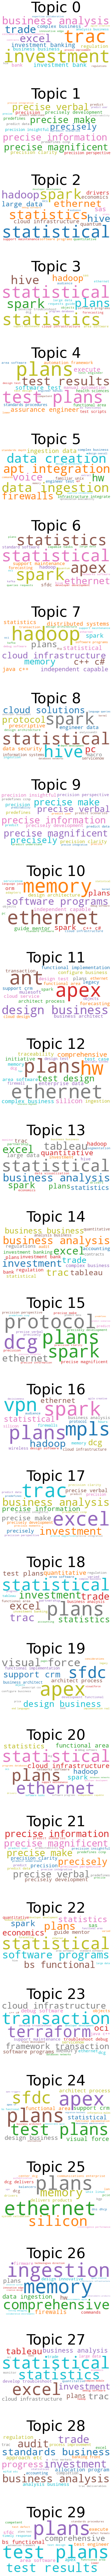

In [15]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  max_words=50,
                  colormap='tab10',
                  prefer_horizontal=1.0)

topics = lda_final.show_topics(num_topics=30, num_words=20, formatted=False)

fig, axes = plt.subplots(30, 1, figsize=(200,200))


for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=70)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=80))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(h_pad=10, w_pad=10)
plt.savefig('TopicWordCloud.pdf')
plt.show()